# 결정 트리 회귀 (Decision Tree Regression)
결정 트리 회귀는 연속적인 값(숫자)을 예측하기 위해 사용되는 지도 학습 알고리즘 중 하나입니다. 이름에서 알 수 있듯이, 데이터를 나무(Tree) 구조로 표현하여 예측을 수행합니다. 각 내부 노드(Internal Node)는 특정 특성(Feature)에 대한 질문(분기 조건)을 나타내고, 가지(Branch)는 해당 질문의 답에 따라 데이터를 나눕니다. 최종적으로 리프 노드(Leaf Node)에 도달하면 해당 노드에 속한 데이터들의 평균값 또는 중앙값 등으로 예측값을 결정합니다.

In [44]:
import pandas as pd

df = pd.read_csv("diabetes.csv")
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [45]:
X = df.drop("target", axis = 1)
Y = df['target']

In [46]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, Y)

In [47]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
model = DecisionTreeRegressor()
model.fit(train_x, train_y)

DecisionTreeRegressor()

In [48]:
print(model.score(train_x, train_y))
print(model.score(test_x, test_y))

1.0
0.13004022804572124


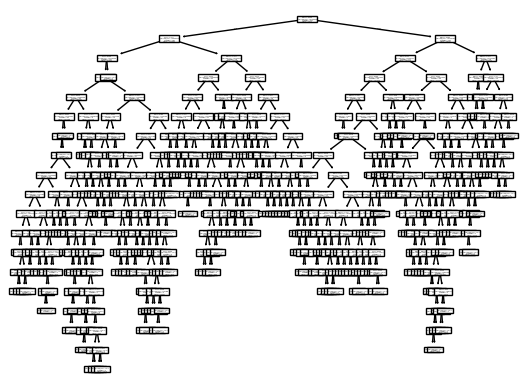

In [49]:
import matplotlib.pyplot as plt
plot_tree(model, feature_names=diabetes['feature_names'])
plt.show()

## GridSearchCV (격자 탐색 교차 검증)
사용자가 지정한 하이퍼파라미터 값들의 모든 가능한 조합을 ```격자(Grid)```처럼 만들어, 각 조합에 대해 교차 검증을 수행하여 성능을 평가합니다. 가장 높은 교차 검증 평균 점수를 보인 하이퍼파라미터 조합을 최적의 조합으로 선택합니다.

In [50]:
# 튜닝할 하이퍼파라미터 후보군 설정
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 3, 5, 10, 20],
    'max_features': [None, 'sqrt', 'log2', 0.7]}

In [53]:
from sklearn.model_selection import GridSearchCV
model = DecisionTreeRegressor()

grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error') # 또는 'r2' 사용 가능

grid_search.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'max_features': [None, 'sqrt', 'log2', 0.7],
                         'min_samples_leaf': [1, 3, 5, 10, 20],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='neg_mean_squared_error')

In [54]:
grid_search.best_params_

{'max_depth': None,
 'max_features': 0.7,
 'min_samples_leaf': 20,
 'min_samples_split': 20}

In [55]:
grid_search.best_score_

-3752.8045824186934

In [59]:
model = grid_search.best_estimator_
model.score(test_x, test_y)

0.4106298255816325

In [76]:
pd.DataFrame(grid_search.cv_results_).to_excel("result_grid_search.xlsx", index = False)

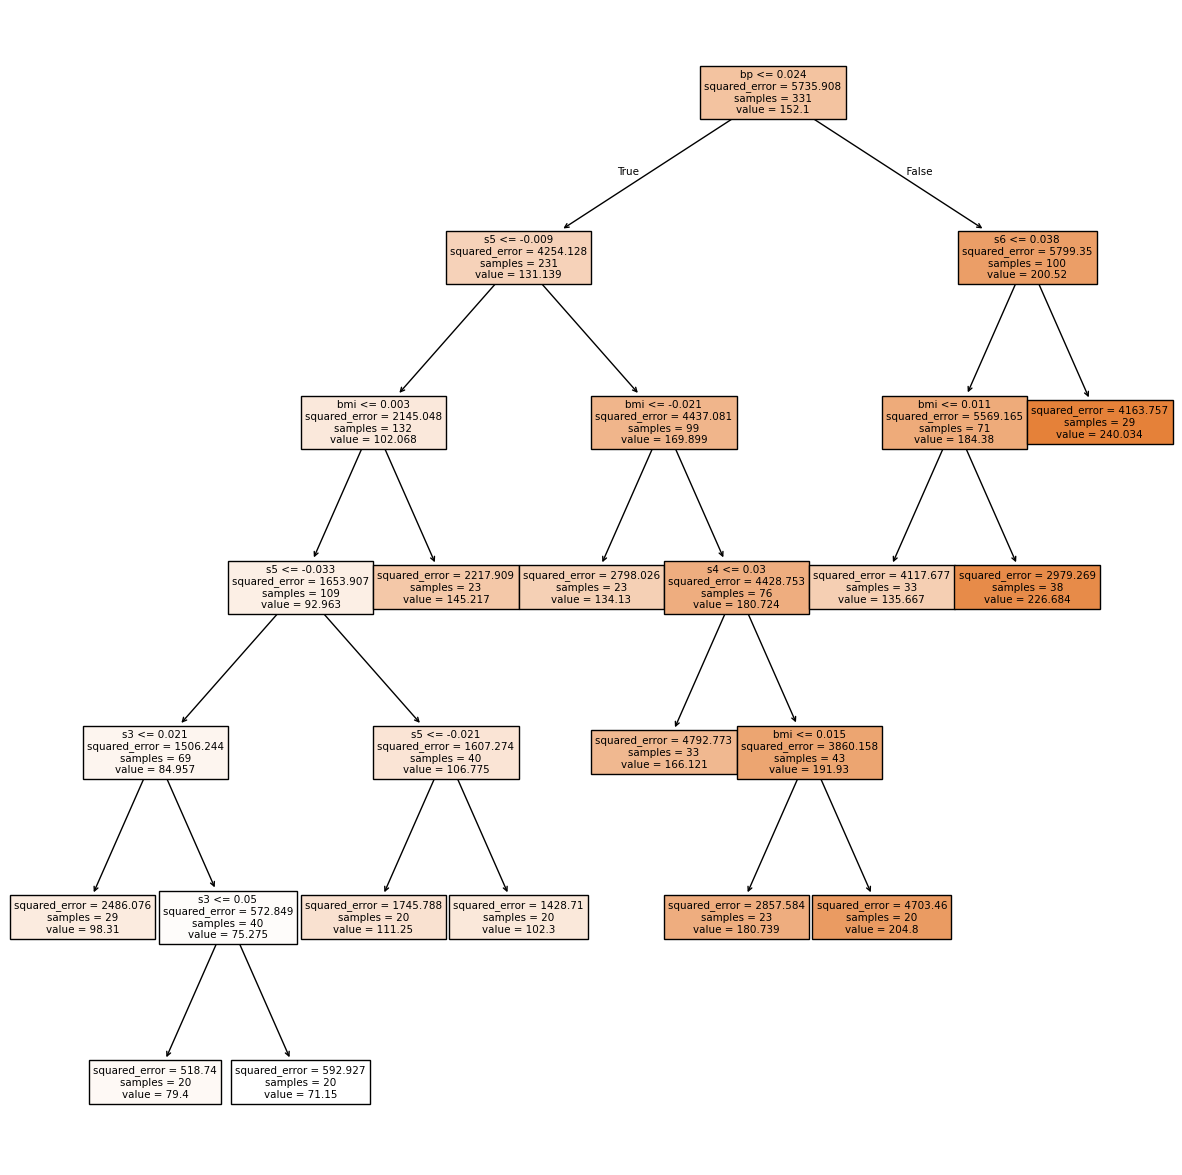

In [68]:
plt.figure(figsize = (15, 15))
plot_tree(model, filled=True, feature_names=X.columns)
plt.show()

## RandomizedSearchCV (랜덤 탐색 교차 검증)
GridSearchCV처럼 모든 조합을 시도하는 대신, 지정된 하이퍼파라미터 분포(distribution) 또는 목록에서 정해진 횟수(n_iter)만큼 조합을 ```무작위로 추출(sampling)```하여 테스트합니다. 추출된 조합들 중에서 가장 높은 교차 검증 평균 점수를 보인 조합을 최적으로 선택합니다.

In [70]:
from sklearn.model_selection import RandomizedSearchCV

model = DecisionTreeRegressor()

random_search = RandomizedSearchCV(estimator=model,
                                 param_distributions=param_grid,
                                 n_iter=50,
                                 cv=5,
                                 scoring='r2')

random_search.fit(train_x, train_y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=50,
                   param_distributions={'max_depth': [3, 5, 7, 10, None],
                                        'max_features': [None, 'sqrt', 'log2',
                                                         0.7],
                                        'min_samples_leaf': [1, 3, 5, 10, 20],
                                        'min_samples_split': [2, 5, 10, 20]},
                   scoring='r2')

In [71]:
random_search.best_params_

{'min_samples_split': 20,
 'min_samples_leaf': 20,
 'max_features': 'log2',
 'max_depth': 5}

In [72]:
random_search.best_score_

0.3087164451507725

In [73]:
model = random_search.best_estimator_

In [74]:
model.score(test_x, test_y)

0.3522278901759448

In [77]:
pd.DataFrame(random_search.cv_results_).to_excel("result_random_search.xlsx", index = False)

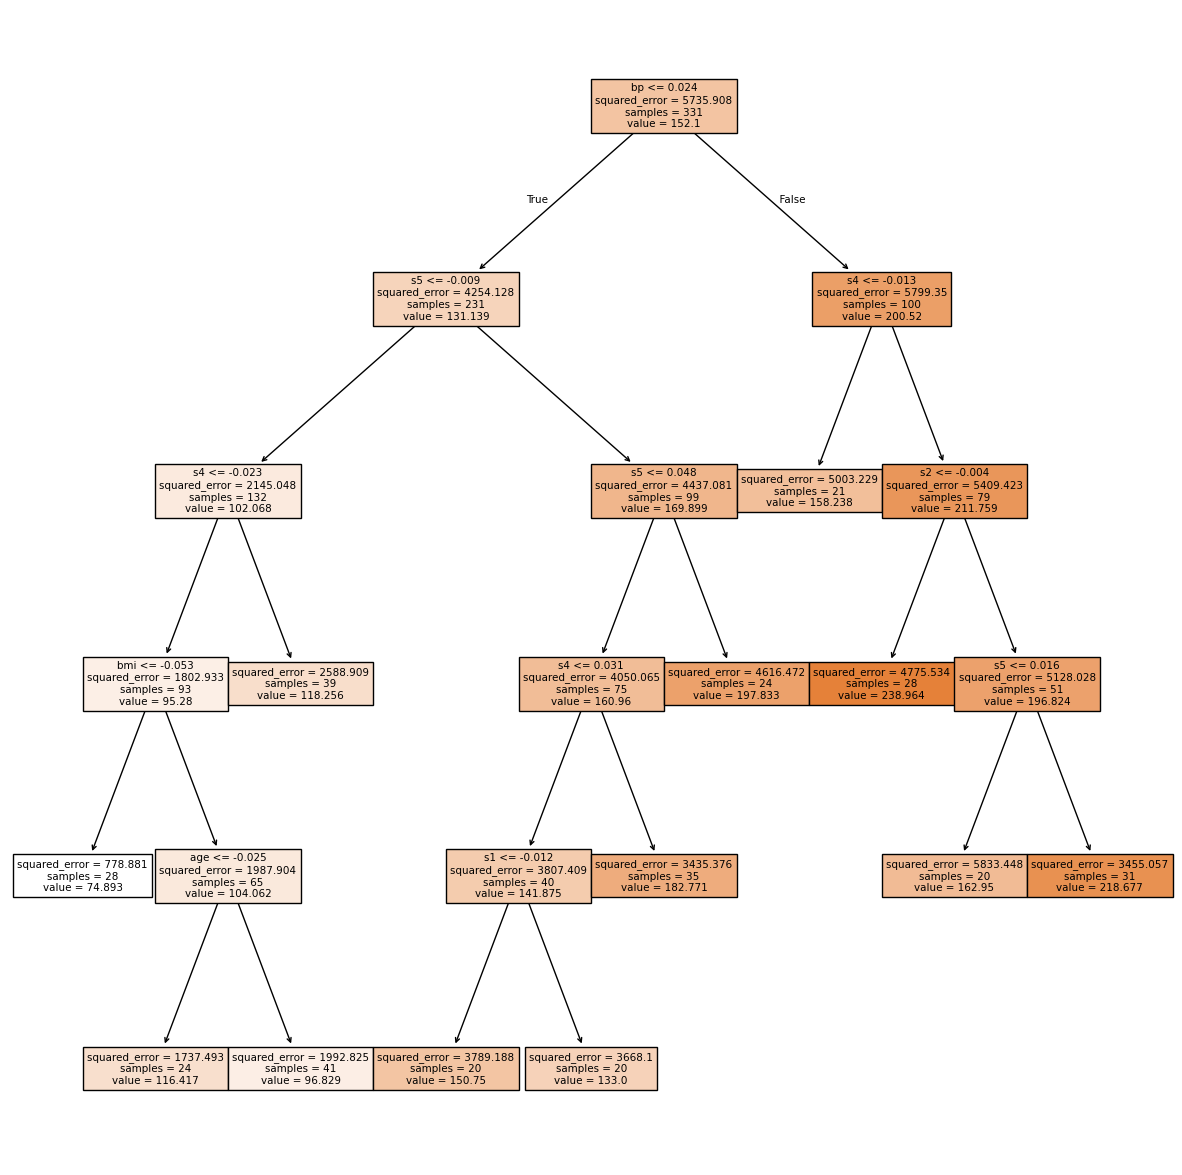

In [78]:
plt.figure(figsize = (15, 15))
plot_tree(model, filled=True, feature_names=X.columns)
plt.show()